# Question 1

In [1]:
with open('assign2fit.txt') as fin, open('fit.txt', 'w') as fout:
    for line in fin:
        fout.write(line.replace('\t', ','))
fin = open("fit.txt", "rt")
data = fin.read()
data = data.replace('#', '').replace(' ','')
fin.close()
fin = open("fit.txt", "wt")
fin.write(data)
fin.close()

In [2]:
import pandas as pd

read_file = pd.read_csv (r'E:\NISER\Physics\Online classes\P452-Comp Phy\Assignment 2\fit.txt')
read_file.to_csv (r'E:\NISER\Physics\Online classes\P452-Comp Phy\Assignment 2\fit.csv', index=None)

In [3]:
df = pd.read_csv (r'E:\NISER\Physics\Online classes\P452-Comp Phy\Assignment 2\fit.csv')
print(df)

       x      y
0   0.00  0.486
1   0.05  0.866
2   0.10  0.944
3   0.15  1.144
4   0.20  1.103
5   0.25  1.202
6   0.30  1.166
7   0.35  1.191
8   0.40  1.124
9   0.45  1.095
10  0.50  1.122
11  0.55  1.102
12  0.60  1.099
13  0.65  1.017
14  0.70  1.111
15  0.75  1.117
16  0.80  1.152
17  0.85  1.265
18  0.90  1.380
19  0.95  1.575
20  1.00  1.857


In [4]:
x = df['x'].to_numpy()
y = df['y'].to_numpy()
print(x,y)

[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ] [0.486 0.866 0.944 1.144 1.103 1.202 1.166 1.191 1.124 1.095 1.122 1.102
 1.099 1.017 1.111 1.117 1.152 1.265 1.38  1.575 1.857]


In [5]:
import numpy as np

## Original basis

In [6]:
row = len(x)
mat_A = np.zeros((row,4))

for i in range(row):
    for j in range(4):
        mat_A[i][j]= pow(x[i],j)
mat_At = mat_A.T
mat_A1 = np.dot(mat_At,mat_A)
mat_y1 = np.dot(mat_At,y)


In [7]:
from comp_phy import Conjugate_Gradient as CG

In [8]:
x_ini = np.ones(4)
mat_c = CG.Conjugate_Gradient(mat_A1,mat_y1,x_ini)     #coefficient matrix

Iteration: 4 	 x = [  0.57465867   4.72586144 -11.12821778   7.66867762] 	 residual = 0.0000


In [15]:
coeffs = np.flip(mat_c)

In [13]:
import matplotlib.pyplot as plt

(-1.0, 2.0)

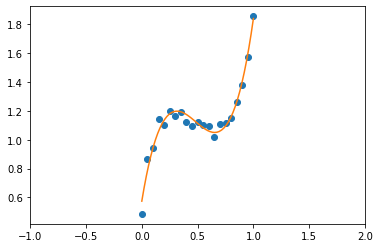

In [29]:
poly = np.poly1d(coeffs)


x_new = np.linspace(x[0],x[-1])

y_new = np.polyval(poly, x_new)

plt.plot(x, y, "o", x_new, y_new)

plt.xlim([x[0]-1, x[-1] + 1 ])


## Modified Basis

In [22]:
def phi(x):
    return 1, 2*x - 1, 8*pow(x,2) - 8*x + 1, 32*pow(x,3) - 48*pow(x,2) + 18*x - 1

In [43]:
def mod_bas(coeff,x):
    row0 = len(x)
    row1 = len(coeff)
    y = np.zeros(row0)
    for i in range(row0):
        temp = phi(x[i])
        for j in range(row1):
            y[i] +=  coeff[j]*temp[j]
    return y

(-1.0, 2.0)

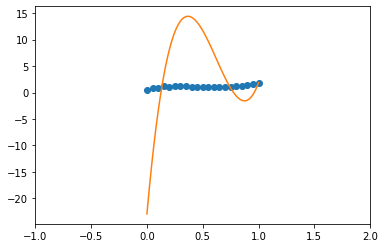

In [45]:
y_mod = mod_bas(mat_c,x_new)

plt.plot(x, y, "o", x_new, y_mod)

plt.xlim([x[0]-1, x[-1] + 1 ])


# Question 2